# Calculating Beta

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stocks = '^GSPC AAPL'.split()
data = pdr.get_data_yahoo(stocks, '2013-12-01')['Close']
data = data.resample('BM').last()

In [6]:
data = data[2:]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2014-02-28 to 2019-01-31
Freq: BM
Data columns (total 2 columns):
AAPL     60 non-null float64
^GSPC    60 non-null float64
dtypes: float64(2)
memory usage: 1.4 KB


In [10]:
change = pd.DataFrame()
for column in data:
    if column not in change:
        change[column] = np.log(data[column]).diff()
change = change[1:]        

In [11]:
from sklearn.linear_model import LinearRegression as lr
model = lr(fit_intercept=True)
x = np.array(change['^GSPC'])
y = np.array(change['AAPL'])
model.fit(x[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'S&P')

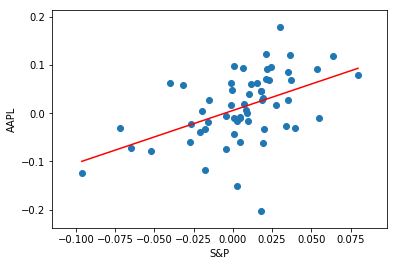

In [12]:
xfit = np.linspace(x.min(),x.max(),100)
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit, c='r')
plt.ylabel('AAPL')
plt.xlabel('S&P')

In [13]:
model.coef_

array([1.09747849])

In [14]:
model.predict(.01)

array([0.01673338])

In [15]:
cov = np.cov(change['AAPL'], change['^GSPC'], ddof=1)
cov

array([[0.00523399, 0.00107867],
       [0.00107867, 0.00098286]])

In [16]:
beta = cov[0,1] / cov[1,1]
beta

1.0974784914491704